# Case Study on the Diamond Dataset

## Information

In this lesson, you'll be working with a dataset regarding the prices and attributes of approximately 54,000 round-cut diamonds. You'll go through the steps of an explanatory data visualization, systematically starting from univariate visualizations, moving through bivariate visualizations, and finally multivariate visualizations. Finally, you'll work on polishing up selected plots from the analysis so that their main points can be clearly conveyed to others.

You can find a copy of the dataset in the Resources tab of the classroom; it will automatically be available to you in the workspaces of this lesson. The dataset consists of almost 54,000 rows and 10 columns:

- price: Price in dollars. Data was collected in 2008.
- carat: Diamond weight. 1 carat is equal to 0.2 grams.
- cut: Quality of diamond cut, affects its shine. Grades go from (low) Fair, Good, Very Good, Premium, Ideal (best).
- color: Measure of diamond coloration. Increasing grades go from (some color) J, I, H, G, F, E, D (colorless).
- clarity: Measure of diamond inclusions. Increasing grades go from (inclusions) I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless).
- x, y, z: Diamond length, width, and depth, respectively, in mm.
- table: Ratio of width of top face of diamond to its overall width, as a percentage.
- depth: Proportional depth of diamond, as a percentage. This is computed as 2 * z / (x + y), or the ratio of the depth to the average of length and width.

For the case study, we will concentrate only the variables in the top five bullet points: price and the four 'C's of diamond grade. 

Our focus will be on answering the question: The degree of importance that each of these quality measures has on the pricing of a diamond.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

### Dataset Overview
Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [3]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Univariate Exploration
Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

In [12]:
np.log10(diamonds.price.describe())

count    4.731911
mean     3.594702
std      3.600912
min      2.513218
25%      2.977724
50%      3.380392
75%      3.726258
max      4.274689
Name: price, dtype: float64

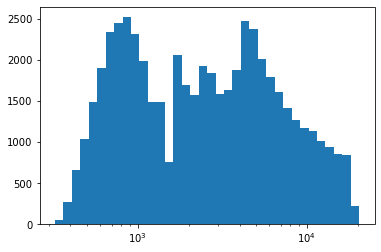

In [18]:
# univariate plot of diamond prices
bin_edges = 10 ** np.arange(2.51, 4.28+0.05, 0.05)
plt.hist(data=diamonds, x='price', bins=bin_edges)
plt.xscale('log');
x_ticks = []